<a href="https://colab.research.google.com/github/DanielRg3/DanielsPortfolioHW2/blob/main/Actividad2analisisPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Daniel Ruíz Gutiérrez
*   MATRÍCULA: A01100513


---

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
air_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Ciencia y Analítica de Datos/Semana 2/LaqnData.csv')
air_df


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire: 

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


---
1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje total de valores faltantes

  R. Hay 3230 valores faltantes en la columna de Value. El porcentaje de los valores faltantes es: 7.37%

In [18]:
air_df.shape

(43800, 6)

In [19]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [15]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [16]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [20]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [17]:
air_df['Value'].isnull().sum()*100/len(air_df)


7.3744292237442925

---
2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
  
  R. Se hicierno 43,800 mediciones (igual al número de renglones en el DataFrame)

  R. De cada contaminante se obtuvieron 8,760 mediciones
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

  R. Se analizaron 5 contaminantes diferentes {NO, NO2, NOX, PM10 y 1M2.5}
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

  R. Site y Provisional or Ratified poseen el mismo atributo en cada medición.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [23]:
len(air_df)

43800

In [28]:
air_df.Site.value_counts()

CT3    43800
Name: Site, dtype: int64

In [26]:
air_df.Species.value_counts()

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64

In [29]:
air_df.ReadingDateTime.value_counts()

01/01/2017 00:00    5
01/09/2017 10:00    5
01/09/2017 04:00    5
01/09/2017 05:00    5
01/09/2017 06:00    5
                   ..
02/05/2017 10:00    5
02/05/2017 09:00    5
02/05/2017 08:00    5
02/05/2017 07:00    5
31/12/2017 23:00    5
Name: ReadingDateTime, Length: 8760, dtype: int64

In [30]:
air_df.Value.value_counts()

8.00000      467
11.00000     464
7.00000      451
10.00000     449
9.00000      443
            ... 
396.79999      1
295.60001      1
236.60001      1
198.89999      1
156.89999      1
Name: Value, Length: 1847, dtype: int64

In [31]:
air_df.Units.value_counts()

ug m-3           26280
ug m-3 as NO2     8760
ug/m3             8760
Name: Units, dtype: int64

In [34]:
air_df.Site.nunique()

1

In [35]:
air_df['Provisional or Ratified'].nunique()

1

In [36]:
air_df['Units'].nunique()

3

In [51]:
del air_df['Site']

In [53]:
del air_df['Provisional or Ratified']

In [54]:
del air_df['Units']

In [55]:
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


---
3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

  R. Sí, el conteo de valores por categría para la columna *Species* da 8,760 mediciones por cada uno de los 5 contaminante, lo cual en total nos dan las 43,800 mediciones que posee el DataFrame a pesar de que la columna *Value* posee 85 ceros y 3230 celdas vacías.

In [50]:
air_df.Species.value_counts()

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64

In [20]:
air_df.groupby('Species').count()

,Site,ReadingDateTime,Value,Units,Provisional or Ratified
Species,,,,,
NO,8760,8760,8660,8760,8760
NO2,8760,8760,8660,8760,8760
NOX,8760,8760,8660,8760,8760
PM10,8760,8760,8657,8760,8760
PM2.5,8760,8760,5933,8760,8760


In [18]:
A=8760*5
A

43800

---
4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [60]:
air_df.groupby('Species').mean()

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


---
5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [56]:
pvt_df = air_df.pivot('ReadingDateTime','Species')
pvt_df

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN
...                ...   ...   ...   ...   ...
31/12/2017 19:00   0.7  17.5  18.5  16.3  -2.0
31/12/2017 20:00   0.7  17.5  18.6  14.5   6.0
31/12/2017 21:00   0.7  14.1  15.1   8.6   5.0
31/12/2017 22:00   1.1  22.0  23.6  12.5   5.0
31/12/2017 23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

---
6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

  R. El mayor valor de NO2 es 120.200 y se obtuvo el día 24/1/2017
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?

  R. El menor valor de PM10 es de -5.6 y fue registrado el día 12/9/2017
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?

  R. La mediana de NO es 15.045115 y se interpreta como su valor promedio. Ahora como su desviación estandar es de 26.67 su valor máximo es de 401.8 y el mínimo de -2.0 podemos decir que hay valores atípicos muy altos y esto esta aumentando el valor de la desviación.
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?
  R. El primer cuartil de PM2.5 es 7.0 y se define como el valor promedio de los valores más bajos en el primer cuarto o el primer 25% de los datos

In [79]:
air_df.groupby('Species').describe()

Value                                                        
          count       mean        std  min   25%   50%   75%        max
Species                                                                
NO       8660.0  15.045115  26.678565 -2.0   3.1   7.1  15.5  401.79999
NO2      8660.0  38.010185  18.580841  2.8  23.8  35.3  49.9  120.20000
NOX      8660.0  61.078661  54.584805  1.0  30.3  46.9  73.8  734.29999
PM10     8657.0  22.551704  15.344755 -5.6  13.9  19.5  27.3  633.09998
PM2.5    5933.0  14.999831  13.558588 -8.0   7.0  11.0  18.0  128.00000

In [45]:
air_df.groupby('Species').max()

,Site,ReadingDateTime,Value,Units,Provisional or Ratified
Species,,,,,
NO,CT3,31/12/2017 23:00,401.79999,ug m-3,R
NO2,CT3,31/12/2017 23:00,120.20000,ug m-3,R
NOX,CT3,31/12/2017 23:00,734.29999,ug m-3 as NO2,R
PM10,CT3,31/12/2017 23:00,633.09998,ug/m3,R
PM2.5,CT3,31/12/2017 23:00,128.00000,ug m-3,R


In [82]:
air_df.groupby('Species').min()

,ReadingDateTime,Value
Species,,
NO,01/01/2017 00:00,-2.0
NO2,01/01/2017 00:00,2.8
NOX,01/01/2017 00:00,1.0
PM10,01/01/2017 00:00,-5.6
PM2.5,01/01/2017 00:00,-8.0


---
7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

In [58]:
pvt_df

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN
...                ...   ...   ...   ...   ...
31/12/2017 19:00   0.7  17.5  18.5  16.3  -2.0
31/12/2017 20:00   0.7  17.5  18.6  14.5   6.0
31/12/2017 21:00   0.7  14.1  15.1   8.6   5.0
31/12/2017 22:00   1.1  22.0  23.6  12.5   5.0
31/12/2017 23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [57]:
pvt_df.columns

MultiIndex([('Value',    'NO'),
            ('Value',   'NO2'),
            ('Value',   'NOX'),
            ('Value',  'PM10'),
            ('Value', 'PM2.5')],
           names=[None, 'Species'])

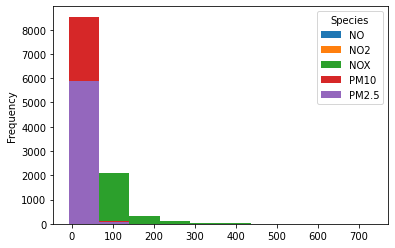

In [64]:
pvt_df.Value.plot.hist()

---
8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [72]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) #Del DataFrame "air_df" toma los valores del ReadingDataTime, los separa en día y hora y se los asigna a un nuevo DataFrame llamado "datetime_df"
datetime_df.columns = ['Date','Time'] #Al nuevo DataFrame "datetime_df" le asigna nombres los nombres día y Hora a las columnas.
datetime_df #Imprime el DataFrame
date_df = datetime_df.Date.str.split('/',expand=True) #Nuevamente, toma los valores del día y los separa en día, mes y año y lo manda a un nuevo DataFrame llamado "date_df"
date_df.columns = ['Day','Month','Year'] #Le asigna el nombre de día, mes y año a las columnas del nuevo DataFrame "date_df"
date_df #Imprime el nuevo DataFrame "date_df"
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])#Toma el DataFrame original "air_df" y le une los nuevos DataFrames "date_df" y "datetime_df"
air_df = air_df.set_index(['Month','Day','Time','Species']) #Reasigna el nombre de las columnas nuevas en el DataFrame original
air_df #Imprime el DataFrame original

AttributeError: ignored

---
9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

  R. Son iguales en cuanto al contenido interno en las columnas, sin embargo, mi DataFrame pvt_df no separa las columnas en mes, día y hora; las deja todas juntas en ReadingDateTime

In [73]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [74]:
pvt_df

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN
...                ...   ...   ...   ...   ...
31/12/2017 19:00   0.7  17.5  18.5  16.3  -2.0
31/12/2017 20:00   0.7  17.5  18.6  14.5   6.0
31/12/2017 21:00   0.7  14.1  15.1   8.6   5.0
31/12/2017 22:00   1.1  22.0  23.6  12.5   5.0
31/12/2017 23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

---
10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

  R. .unstack() toma la información de algún index o columna y la ingresa en la tabla como un título del cual sus atributos se convertirán en columnas de la tabla.

  R. .stack() hace lo contrario, toma un título de la tabla y su valor lo ingresa en la tabla como valores del index.

  R. .pivot() se utiliza para reorganizar la información de un DataFrame del index a títulos de columnas.

  R. .melt() se utiliza para convertir el formato amcho de una tabla a formato largo.

  R. La contraparte de unstack() es pivot. A grandes razgos convierte la información al mismo formato.

In [75]:
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

In [80]:
air_df.stack()

Month  Day  Time   Species       
01     01   00:00  NO       Value    3.5
            01:00  NO       Value    3.6
            02:00  NO       Value    2.2
            03:00  NO       Value    2.1
            04:00  NO       Value    3.3
                                    ... 
12     31   19:00  PM2.5    Value   -2.0
            20:00  PM2.5    Value    6.0
            21:00  PM2.5    Value    5.0
            22:00  PM2.5    Value    5.0
            23:00  PM2.5    Value    6.0
Length: 40570, dtype: float64

In [77]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [86]:
pvt_df #this is a pivot of air_df

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN
...                ...   ...   ...   ...   ...
31/12/2017 19:00   0.7  17.5  18.5  16.3  -2.0
31/12/2017 20:00   0.7  17.5  18.6  14.5   6.0
31/12/2017 21:00   0.7  14.1  15.1   8.6   5.0
31/12/2017 22:00   1.1  22.0  23.6  12.5   5.0
31/12/2017 23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

In [84]:
air_df.melt()

,variable,value
0,Value,3.5
1,Value,3.6
2,Value,2.2
3,Value,2.1
4,Value,3.3
...,...,...
43795,Value,-2.0
43796,Value,6.0
43797,Value,5.0
43798,Value,5.0
